In [4]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
#Load the dataset
df = pd.read_excel("FMCG_Sales_Customer_2024.xlsx")

In [6]:
# Listdown the columns
df.columns

Index(['Invoice_ID', 'Invoice_Date', 'Customer_ID', 'Customer_Segment',
       'Region', 'Product_ID', 'Product_Category', 'Brand', 'Price_per_Unit',
       'Units_Sold', 'Promotion_Offer', 'Promotion_Type', 'Distributor_ID',
       'Return_Requested', 'Customer_Satisfaction', 'Shelf_Life',
       'Total_Sales', 'Manufacture_Date', 'Expiry_Date'],
      dtype='object')

In [5]:
#Understand the features and type of features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Invoice_ID             1000 non-null   object        
 1   Invoice_Date           1000 non-null   datetime64[ns]
 2   Customer_ID            1000 non-null   object        
 3   Customer_Segment       1000 non-null   object        
 4   Region                 1000 non-null   object        
 5   Product_ID             1000 non-null   object        
 6   Product_Category       1000 non-null   object        
 7   Brand                  1000 non-null   object        
 8   Price_per_Unit         1000 non-null   float64       
 9   Units_Sold             1000 non-null   int64         
 10  Promotion_Offer        1000 non-null   object        
 11  Promotion_Type         393 non-null    object        
 12  Distributor_ID         1000 non-null   object        
 13  Retu

Date Columns are Invoice_Date, Manufacture_Date, Expiry_Date

Categorical Columns are Customer_Segment, Region, Product_Category, Brand, Promotion_Offer, Promotion_Type, Return_Requested.

Numerical Columns: Price_per_Unit, Units_Sold, Total_Sales, Customer_Satisfaction, Shelf_Life

In [6]:
df.describe()

,Invoice_Date,Price_per_Unit,Units_Sold,Customer_Satisfaction,Shelf_Life,Total_Sales,Manufacture_Date,Expiry_Date
count,1000,1000.000000,1000.000000,722.000000,1000.000000,1000.00000,1000,1000
mean,2023-07-02 13:30:43.200000256,250.225590,98.483000,2.922438,424.969000,24517.65228,2023-06-02 12:47:31.200000,2024-07-31 12:02:52.799999744
min,2023-01-01 00:00:00,12.270000,1.000000,1.000000,90.000000,103.14000,2022-11-09 00:00:00,2023-02-22 00:00:00
25%,2023-04-08 00:00:00,125.625000,46.750000,2.000000,267.750000,6630.67000,2023-03-05 00:00:00,2024-02-08 00:00:00
50%,2023-06-29 00:00:00,253.435000,98.000000,3.000000,437.000000,18232.04000,2023-05-27 00:00:00,2024-08-11 00:00:00
75%,2023-10-04 00:00:00,374.715000,150.000000,4.000000,582.250000,36242.91750,2023-09-02 06:00:00,2025-01-09 12:00:00
max,2023-12-31 00:00:00,499.860000,199.000000,5.000000,729.000000,95752.58000,2023-12-21 00:00:00,2025-11-29 00:00:00
std,NaN,143.147463,58.573907,1.417963,184.023664,21661.82293,NaN,NaN


## Data Cleaning and preparation - handling missing values and outliers if any

In [7]:
#check the null values
df.isnull().sum()

Invoice_ID                 0
Invoice_Date               0
Customer_ID                0
Customer_Segment           0
Region                     0
Product_ID                 0
Product_Category           0
Brand                      0
Price_per_Unit             0
Units_Sold                 0
Promotion_Offer            0
Promotion_Type           607
Distributor_ID             0
Return_Requested           0
Customer_Satisfaction    278
Shelf_Life                 0
Total_Sales                0
Manufacture_Date           0
Expiry_Date                0
dtype: int64

In [9]:
## In the promotion type, the missing values might denote that there were no promotions
df['Promotion_Type'].unique()

df['Promotion_Type'] = df.apply(
    lambda row: 'No Promotion' if (pd.isnull(row['Promotion_Type']) and row['Promotion_Offer'] == 'No') 
                else ('Other Promotion' if pd.isnull(row['Promotion_Type']) else row['Promotion_Type']),
    axis=1
)


In [9]:
## In the customer satisfaction, there are 278 missing values 
df['Customer_Satisfaction'] = df.groupby('Customer_Segment')['Customer_Satisfaction'].transform(lambda x: x.fillna(x.mean()))

In [10]:
# Feature engineering
df['Invoice_Month'] = df['Invoice_Date'].dt.month
df['Invoice_Weekday'] = df['Invoice_Date'].dt.day_name()
df['Days_To_Expiry'] = (df['Expiry_Date'] - df['Manufacture_Date']).dt.days

In [11]:
df.head()

,Invoice_ID,Invoice_Date,Customer_ID,Customer_Segment,Region,Product_ID,Product_Category,Brand,Price_per_Unit,Units_Sold,...,Distributor_ID,Return_Requested,Customer_Satisfaction,Shelf_Life,Total_Sales,Manufacture_Date,Expiry_Date,Invoice_Month,Invoice_Weekday,Days_To_Expiry
0,INV100000,2023-11-24,CUST1557,Consumer,South,PROD745,Home Care,SipUp,193.52,47,...,DIST127,No,1.000000,631,9095.44,2023-10-22,2025-07-14,11,Friday,631
1,INV100001,2023-02-27,CUST1230,Retailer,North,PROD921,Home Care,Glorix,475.85,12,...,DIST126,No,1.000000,326,5710.20,2023-01-27,2023-12-19,2,Monday,326
2,INV100002,2023-01-13,CUST1663,Retailer,North,PROD656,Home Care,CleanEdge,368.68,62,...,DIST117,No,5.000000,368,22858.16,2022-11-30,2023-12-03,1,Friday,368
3,INV100003,2023-05-21,CUST1152,Wholesaler,West,PROD913,Personal Care,FreshMint,303.34,80,...,DIST107,No,2.888889,437,24267.20,2023-04-01,2024-06-11,5,Sunday,437
4,INV100004,2023-05-06,CUST1930,Wholesaler,East,PROD119,Home Care,SipUp,86.45,83,...,DIST143,No,2.888889,716,7175.35,2023-03-10,2025-02-23,5,Saturday,716


In [12]:
#Drop redundant features
df.drop(['Customer_ID'], axis = 1, inplace=True)
df.head()

,Invoice_ID,Invoice_Date,Customer_Segment,Region,Product_ID,Product_Category,Brand,Price_per_Unit,Units_Sold,Promotion_Offer,...,Distributor_ID,Return_Requested,Customer_Satisfaction,Shelf_Life,Total_Sales,Manufacture_Date,Expiry_Date,Invoice_Month,Invoice_Weekday,Days_To_Expiry
0,INV100000,2023-11-24,Consumer,South,PROD745,Home Care,SipUp,193.52,47,No,...,DIST127,No,1.000000,631,9095.44,2023-10-22,2025-07-14,11,Friday,631
1,INV100001,2023-02-27,Retailer,North,PROD921,Home Care,Glorix,475.85,12,No,...,DIST126,No,1.000000,326,5710.20,2023-01-27,2023-12-19,2,Monday,326
2,INV100002,2023-01-13,Retailer,North,PROD656,Home Care,CleanEdge,368.68,62,No,...,DIST117,No,5.000000,368,22858.16,2022-11-30,2023-12-03,1,Friday,368
3,INV100003,2023-05-21,Wholesaler,West,PROD913,Personal Care,FreshMint,303.34,80,No,...,DIST107,No,2.888889,437,24267.20,2023-04-01,2024-06-11,5,Sunday,437
4,INV100004,2023-05-06,Wholesaler,East,PROD119,Home Care,SipUp,86.45,83,Yes,...,DIST143,No,2.888889,716,7175.35,2023-03-10,2025-02-23,5,Saturday,716


## EDA and visualization

#### Total sales by region

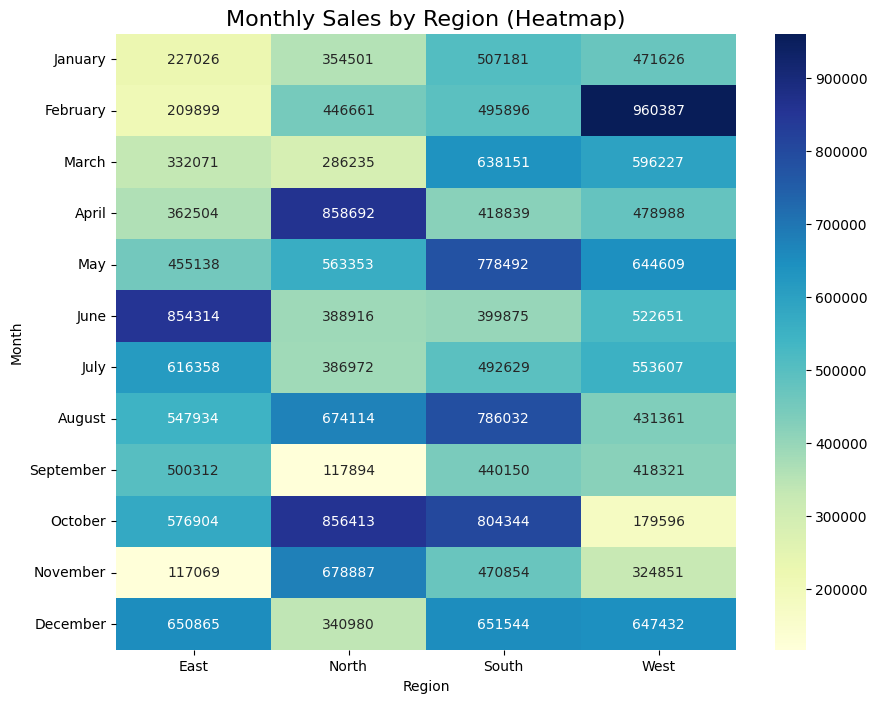

In [4]:
# MONTHLY SALES HEATMAP

# Create Month column
df['Month'] = df['Invoice_Date'].dt.month_name()

# Pivot table
monthly_region_sales = df.pivot_table(values='Total_Sales', index='Month', columns='Region', aggfunc='sum')

# Fix month order
from pandas.api.types import CategoricalDtype
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
               'August', 'September', 'October', 'November', 'December']
cat_month = CategoricalDtype(categories=month_order, ordered=True)
monthly_region_sales.index = monthly_region_sales.index.astype(cat_month)
monthly_region_sales = monthly_region_sales.sort_index()

# Plot Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(monthly_region_sales, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Monthly Sales by Region (Heatmap)', fontsize=16)
plt.ylabel('Month')
plt.xlabel('Region')
plt.show()


C:\Users\PC\AppData\Local\Temp\ipykernel_10112\3494469046.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Region', y='Total_Sales', estimator=np.sum, ci=None)


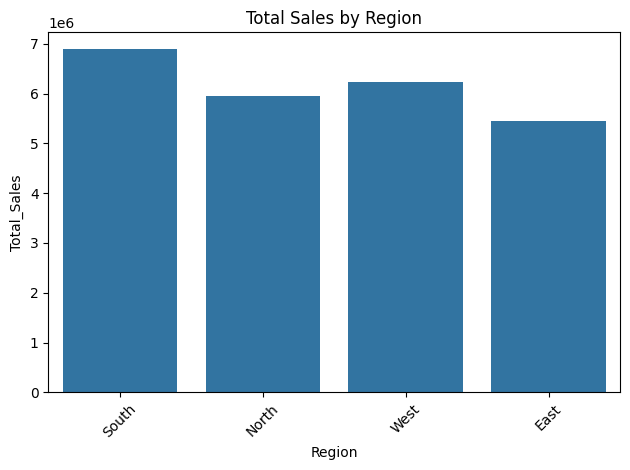

In [13]:
sns.barplot(data=df, x='Region', y='Total_Sales', estimator=np.sum, ci=None)
plt.title("Total Sales by Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### The total sales by the product category

C:\Users\PC\AppData\Local\Temp\ipykernel_10112\1390210113.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Product_Category', y='Total_Sales', estimator=np.sum, ci=None)


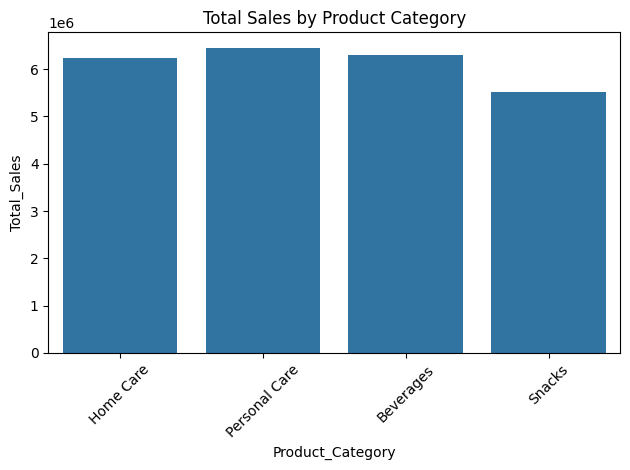

'\nPersonal care products have the highest sales and we can increase the availability of them \n'

In [14]:
sns.barplot(data=df, x='Product_Category', y='Total_Sales', estimator=np.sum, ci=None)
plt.title("Total Sales by Product Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


'''
Personal care products have the highest sales and we can increase the availability of them 
'''

#### the units sold using promotions/ no promotions


The promotion_offer and promotion_type columns have data ambiguity like
1. The promotion offer is No but promotion type is applied
2. The promotion offer is Yes but no promotion type is mentioned


In [10]:
'''
The clean promotion type function is created to clear the mismatch between the columns promotion offer-yes/no and promotion type- none/buy1get1/discount/ empty values

If the promotion offer is No- then the promotion type is set to None
If the promotion offer is Yes -  and has promotions- buy1get1/discount- it is left as it is
If the promotion offer is Yes- but has None/ empty values- it is considered as other promotion
'''

def clean_promotion_type(row):
    if row['Promotion_Offer'] == 'No':
        return 'None'
    elif row['Promotion_Offer'] == 'Yes' and (pd.isnull(row['Promotion_Type']) or row['Promotion_Type'] == 'None' or row['Promotion_Type'] == ''):
        return 'Other Promotion'
    else:
        return row['Promotion_Type']


df['Promotion_Type_Cleaned'] = df.apply(clean_promotion_type, axis=1)

In [16]:
df[df['Invoice_ID']=='INV100010']

,Invoice_ID,Invoice_Date,Customer_Segment,Region,Product_ID,Product_Category,Brand,Price_per_Unit,Units_Sold,Promotion_Offer,...,Return_Requested,Customer_Satisfaction,Shelf_Life,Total_Sales,Manufacture_Date,Expiry_Date,Invoice_Month,Invoice_Weekday,Days_To_Expiry,Promotion_Type_Cleaned
10,INV100010,2023-02-14,Consumer,East,PROD657,Snacks,CleanEdge,20.09,25,No,...,No,3.004545,410,502.25,2023-01-02,2024-02-16,2,Tuesday,410,None


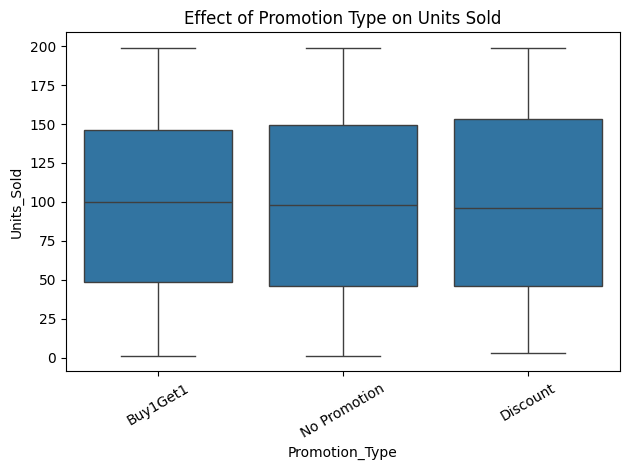

In [17]:
### Visualisation of promotion type before cleaning/ with  mismatch in promotion offer and promotion type

sns.boxplot(data=df, x='Promotion_Type', y='Units_Sold')
plt.title("Effect of Promotion Type on Units Sold")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

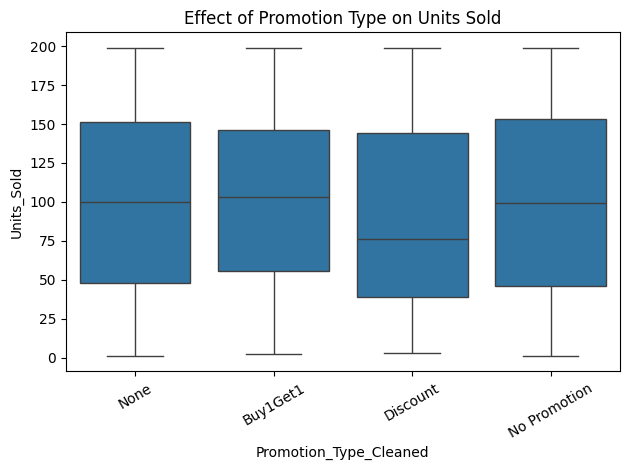

In [ ]:
### after data cleaning and mismatch clearing for promotion offer and promotion type
sns.boxplot(data=df, x='Promotion_Type_Cleaned', y='Units_Sold')
plt.title("Effect of Promotion Type on Units Sold")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

Sales with respect to each brands

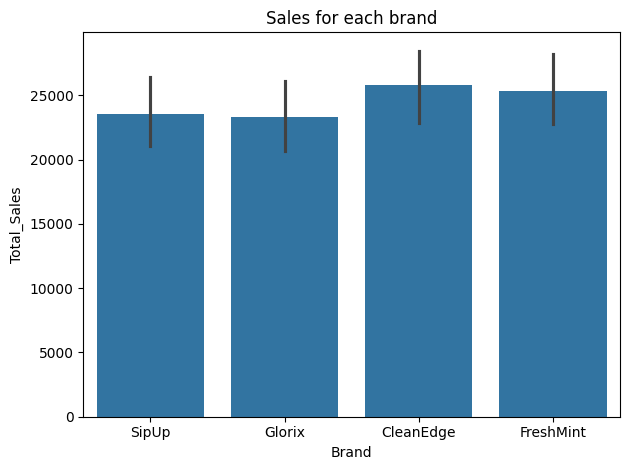

In [19]:
sns.barplot(data=df, x='Brand', y='Total_Sales')
plt.title("Sales for each brand")
plt.tight_layout()
plt.show()

#### Customer satisfaction by the customer segment

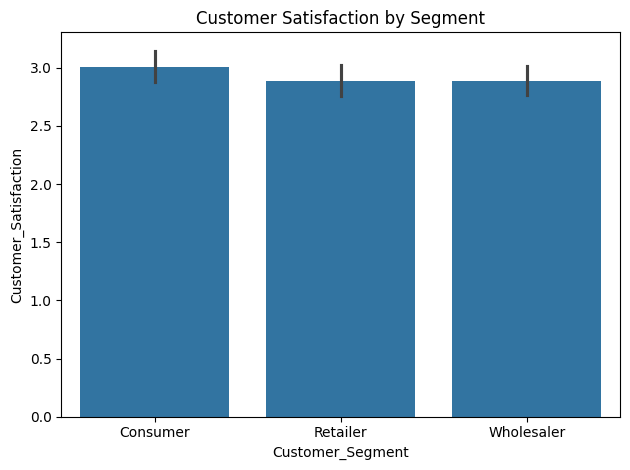

In [20]:
sns.barplot(data=df, x='Customer_Segment', y='Customer_Satisfaction')
plt.title("Customer Satisfaction by Segment")
plt.tight_layout()
plt.show()

### Monthly sales trend

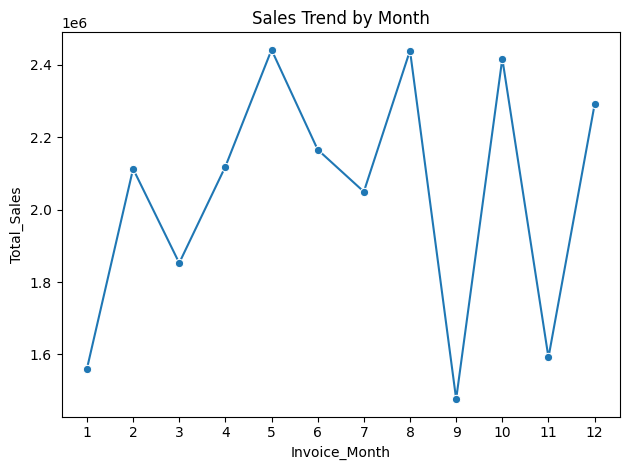

In [21]:
monthly_sales = df.groupby('Invoice_Month')['Total_Sales'].sum().reset_index()
sns.lineplot(data=monthly_sales, x='Invoice_Month', y='Total_Sales', marker='o')
plt.title("Sales Trend by Month")
plt.xticks(monthly_sales['Invoice_Month'])
plt.tight_layout()
plt.show()

Key insights

In [22]:
total_records=len(df)

Promotions_applied = len((df[df['Promotion_Offer'] == 'Yes']))
promotion_percentage = (Promotions_applied/total_records)*100

organic_sales = 100-promotion_percentage

print("The percent of sales when promotion was given is ",promotion_percentage )
print("The percent of organic sales(without any promotions) is ",organic_sales)

The percent of sales when promotion was given is  49.6
The percent of organic sales(without any promotions) is  50.4


In [10]:
# Total number of records
total_records = len(df)

# Total Sales Value (All sales)
overall_total_sales = df['Total_Sales'].sum()

# Sales where Promotion was applied
promo_sales_total = df[df['Promotion_Offer'] == 1]['Total_Sales'].sum()

# Sales where NO Promotion (Organic Sales)
nonpromo_sales_total = df[df['Promotion_Offer'] == 0]['Total_Sales'].sum()

# Promotion Sales Percentage
promo_sales_percentage = (promo_sales_total / overall_total_sales) * 100

# Organic Sales Percentage
nonpromo_sales_percentage = (nonpromo_sales_total / overall_total_sales) * 100

# Print Results
print("Total Overall Sales (₹):", overall_total_sales)
print("Total Promotion Sales (₹):", promo_sales_total)
print("Total Organic Sales (₹):", nonpromo_sales_total)
print("Promotion Sales Percentage (%):", round(promo_sales_percentage,2))
print("Organic Sales Percentage (%):", round(nonpromo_sales_percentage,2))


Total Overall Sales (₹): 24517652.28
Total Promotion Sales (₹): 11282070.42
Total Organic Sales (₹): 13235581.86
Promotion Sales Percentage (%): 46.02
Organic Sales Percentage (%): 53.98


### Organic sales play a very important role in the overall sales

In [23]:
#Customer_Satisfaction average by Region
df.groupby('Region')['Customer_Satisfaction'].mean()    

Region
East     2.892866
North    2.926553
South    2.914240
West     2.951535
Name: Customer_Satisfaction, dtype: float64

In [13]:
#Average Promotion usage by Region

df['Promotion_Offer'] = df['Promotion_Offer'].map({'Yes': 1, 'No': 0}).astype('int')
promotion_offer_by_region = df.groupby('Region')['Promotion_Offer'].mean()
print(promotion_offer_by_region)


Region
East     0.484848
North    0.466403
South    0.525692
West     0.505703
Name: Promotion_Offer, dtype: float64


In [26]:
# Units Sold per Invoice by Region
df.groupby('Region')['Units_Sold'].mean()

Region
East      98.489177
North     96.304348
South    102.494071
West      96.714829
Name: Units_Sold, dtype: float64

In [27]:
## total sales by region

df.groupby('Region')['Total_Sales'].sum()

Region
East     5450393.06
North    5953617.68
South    6883985.99
West     6229655.55
Name: Total_Sales, dtype: float64

### Since East has less customer satisfaction we need to check on the shelf life of the products, promotions and price of the products

In [34]:
promotion_offer_by_region = df.groupby('Region')['Promotion_Offer'].mean() * 100
print("Promotion Offer Usage (%):")
print(promotion_offer_by_region)


Promotion Offer Usage (%):
Region
East     48.484848
North    46.640316
South    52.569170
West     50.570342
Name: Promotion_Offer, dtype: float64


In [35]:
avg_price_by_region = df.groupby('Region')['Price_per_Unit'].mean()
print("\nAverage Price per Unit (₹):")
print(avg_price_by_region)



Average Price per Unit (₹):
Region
East     239.664935
North    253.033597
South    265.474111
West     242.131331
Name: Price_per_Unit, dtype: float64


In [36]:
avg_shelf_life_by_region = df.groupby('Region')['Shelf_Life'].mean()
print("\nAverage Shelf Life (days):")
print(avg_shelf_life_by_region)



Average Shelf Life (days):
Region
East     429.303030
North    437.434783
South    426.355731
West     407.836502
Name: Shelf_Life, dtype: float64


In [41]:
customer_satisfaction_by_region = df.groupby('Region')['Customer_Satisfaction'].mean()
print("\nAverage Customer Satisfaction:")
print(customer_satisfaction_by_region)



Average Customer Satisfaction:
Region
East     2.892866
North    2.926553
South    2.914240
West     2.951535
Name: Customer_Satisfaction, dtype: float64


In [38]:
customer_segment_by_region = df.groupby('Region')['Customer_Segment'].value_counts(normalize=True) * 100
print("\nCustomer Segment Distribution (%):")
print(customer_segment_by_region)



Customer Segment Distribution (%):
Region  Customer_Segment
East    Consumer            37.662338
        Wholesaler          31.601732
        Retailer            30.735931
North   Wholesaler          37.944664
        Retailer            35.177866
        Consumer            26.877470
South   Retailer            37.549407
        Consumer            31.225296
        Wholesaler          31.225296
West    Wholesaler          38.022814
        Retailer            35.741445
        Consumer            26.235741
Name: proportion, dtype: float64


In [39]:
product_category_by_region = df.groupby('Region')['Product_Category'].value_counts(normalize=True) * 100
print("\nProduct Category Distribution (%):")
print(product_category_by_region)



Product Category Distribution (%):
Region  Product_Category
East    Beverages           28.138528
        Home Care           25.108225
        Personal Care       23.376623
        Snacks              23.376623
North   Personal Care       27.272727
        Home Care           26.086957
        Beverages           24.901186
        Snacks              21.739130
South   Home Care           27.667984
        Personal Care       24.901186
        Snacks              24.505929
        Beverages           22.924901
West    Beverages           27.376426
        Home Care           25.095057
        Snacks              25.095057
        Personal Care       22.433460
Name: proportion, dtype: float64


### The sales are low in january, september, november

In [42]:
promotion_offer_by_month = df.groupby('Invoice_Month')['Promotion_Offer'].mean() * 100
print("Promotion Offer Usage by Month (%):")
print(promotion_offer_by_month)

Promotion Offer Usage by Month (%):
Invoice_Month
1     48.684211
2     45.348837
3     56.164384
4     56.976744
5     45.714286
6     42.857143
7     52.777778
8     50.526316
9     49.230769
10    47.916667
11    47.435897
12    52.747253
Name: Promotion_Offer, dtype: float64


In [43]:
avg_sales_by_month = df.groupby('Invoice_Month')['Total_Sales'].mean()
print("\nAverage Total Sales per Invoice by Month (₹):")
print(avg_sales_by_month)



Average Total Sales per Invoice by Month (₹):
Invoice_Month
1     20530.708421
2     24567.940581
3     25379.223973
4     24639.810698
5     23253.250571
6     28126.697013
7     28466.203611
8     25678.325158
9     22718.103077
10    25179.754167
11    20405.908205
12    25173.846264
Name: Total_Sales, dtype: float64


In [44]:
avg_units_by_month = df.groupby('Invoice_Month')['Units_Sold'].mean()
print("\nAverage Units Sold per Invoice by Month:")
print(avg_units_by_month)



Average Units Sold per Invoice by Month:
Invoice_Month
1      89.078947
2     101.616279
3      99.205479
4     102.476744
5      98.619048
6     105.662338
7     101.069444
8      98.842105
9      91.861538
10    103.302083
11     89.897436
12     97.373626
Name: Units_Sold, dtype: float64


In [45]:
product_category_by_month = df.groupby('Invoice_Month')['Product_Category'].value_counts(normalize=True) * 100
print("\nProduct Category Distribution by Month (%):")
print(product_category_by_month)



Product Category Distribution by Month (%):
Invoice_Month  Product_Category
1              Snacks              30.263158
               Home Care           23.684211
               Personal Care       23.684211
               Beverages           22.368421
2              Beverages           30.232558
               Snacks              25.581395
               Home Care           24.418605
               Personal Care       19.767442
3              Snacks              34.246575
               Home Care           24.657534
               Personal Care       24.657534
               Beverages           16.438356
4              Home Care           32.558140
               Personal Care       26.744186
               Beverages           25.581395
               Snacks              15.116279
5              Beverages           29.523810
               Home Care           24.761905
               Snacks              24.761905
               Personal Care       20.952381
6              Personal

## which brand performs well and within which category

In [ ]:
homecare_df = df[df['Product_Category'] == 'Home Care']


In [47]:
homecare_brand_performance = homecare_df.groupby('Brand').agg({
    'Units_Sold': 'sum',
    'Total_Sales': 'sum'
}).sort_values(by='Units_Sold', ascending=False)

print(homecare_brand_performance)


           Units_Sold  Total_Sales
Brand                             
FreshMint        7583   1760180.80
SipUp            7174   1672247.20
Glorix           5799   1410619.91
CleanEdge        5379   1399881.75


In [48]:
promotion_by_brand = homecare_df.groupby('Brand')['Promotion_Offer'].mean() * 100
print("\nPromotion Offer Usage by Brand (%):")
print(promotion_by_brand)



Promotion Offer Usage by Brand (%):
Brand
CleanEdge    51.785714
FreshMint    48.484848
Glorix       48.529412
SipUp        44.285714
Name: Promotion_Offer, dtype: float64


In [54]:
homecare_region_brand = homecare_df.groupby(['Region', 'Brand'])['Units_Sold'].sum().unstack().fillna(0)
print("\nRegion-wise Home Care Brand Sales:")
print(homecare_region_brand)



Region-wise Home Care Brand Sales:
Brand   CleanEdge  FreshMint  Glorix  SipUp
Region                                     
East         1352       1456    1840   1569
North        1106       1412    1409   1857
South        2099       2687     921   1537
West          822       2028    1629   2211


In [55]:
region_brand = df.groupby(['Region', 'Brand'])['Units_Sold'].sum().unstack().fillna(0)
print("\nRegion-wise Brand Sales:")
print(region_brand)



Region-wise Brand Sales:
Brand   CleanEdge  FreshMint  Glorix  SipUp
Region                                     
East         6842       4705    5657   5547
North        5850       6708    6097   5710
South        7841       7211    5108   5771
West         4760       6804    7452   6420


In [50]:
homecare_month_brand = homecare_df.groupby(['Invoice_Month', 'Brand'])['Units_Sold'].sum().unstack().fillna(0)
print("\nMonth-wise Home Care Brand Sales:")
print(homecare_month_brand)



Month-wise Home Care Brand Sales:
Brand          CleanEdge  FreshMint  Glorix  SipUp
Invoice_Month                                     
1                    352        636      81    504
2                    536        608     481    628
3                    227        620     645    485
4                    523       1006     396    767
5                    618        824     657    633
6                    773        359     618    225
7                    116        412     438    138
8                    422        739     479   1073
9                    235        733     313    789
10                   511       1063     942   1036
11                   616        320     199    766
12                   450        263     550    130


In [51]:
# Region to sum Units Sold
brand_region_units = df.groupby(['Brand', 'Region'])['Units_Sold'].sum().reset_index()

# the Region with maximum Units Sold
strongest_region_per_brand = brand_region_units.loc[brand_region_units.groupby('Brand')['Units_Sold'].idxmax()]

print(strongest_region_per_brand)


        Brand Region  Units_Sold
2   CleanEdge  South        7841
6   FreshMint  South        7211
11     Glorix   West        7452
15      SipUp   West        6420


The summaries are given in the powerpoint presentation

The average customer satisfaction rate is 3 

In [7]:
df.groupby('Customer_Segment')['Price_per_Unit'].mean()

Customer_Segment
Consumer      248.446370
Retailer      264.718109
Wholesaler    237.240575
Name: Price_per_Unit, dtype: float64

In [8]:
df.groupby('Customer_Segment')['Units_Sold'].mean()

Customer_Segment
Consumer       96.356436
Retailer      102.581662
Wholesaler     96.224138
Name: Units_Sold, dtype: float64

In [22]:
# Average Customer Satisfaction Rating by Customer Segment
rating_by_segment = df.groupby('Customer_Segment')['Customer_Satisfaction'].mean()

print(rating_by_segment)


Customer_Segment
Consumer      3.004545
Retailer      2.884000
Wholesaler    2.888889
Name: Customer_Satisfaction, dtype: float64


In [17]:
# Group by Customer_Segment and Promotion_Offer
promotion_by_segment = df[df['Promotion_Offer'] == 1].groupby('Customer_Segment').size()

print(promotion_by_segment)


Customer_Segment
Consumer      138
Retailer      185
Wholesaler    173
dtype: int64


### Consumers were given less promotion offers. Retailers 